# Import the necessary libraries for Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\anand\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading the Restaurant dataset into a DataFrame

In [2]:
df=pd.read_csv('dataset.csv',encoding='ISO-8859-1')
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# LEVEL 3-Task 2:: Customer Preference Analysis

# LEVEL 3-Task 2(i):Analyze the relationship between the type of cuisine and the restaurant's rating.


In [3]:
cuisine_stats=df.groupby('Cuisines')['Aggregate rating'].agg(['mean', 'std', 'count'])
print("Summary Statistics for Ratings by Cuisine:")
print(cuisine_stats)

Summary Statistics for Ratings by Cuisine:
                                            mean   std  count
Cuisines                                                     
Afghani                                    0.725  1.45      4
Afghani, Mughlai, Chinese                  0.000   NaN      1
Afghani, North Indian                      0.000   NaN      1
Afghani, North Indian, Pakistani, Arabian  0.000   NaN      1
African                                    4.700   NaN      1
...                                          ...   ...    ...
Western, Asian, Cafe                       4.200   NaN      1
Western, Fusion, Fast Food                 3.200   NaN      1
World Cuisine                              4.900   NaN      1
World Cuisine, Mexican, Italian            4.400   NaN      1
World Cuisine, Patisserie, Cafe            4.200   NaN      1

[1825 rows x 3 columns]


# LEVEL 3-Task 2(ii):Identify the most popular cuisines among customers based on the number of votes.


Top Cuisines based on Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


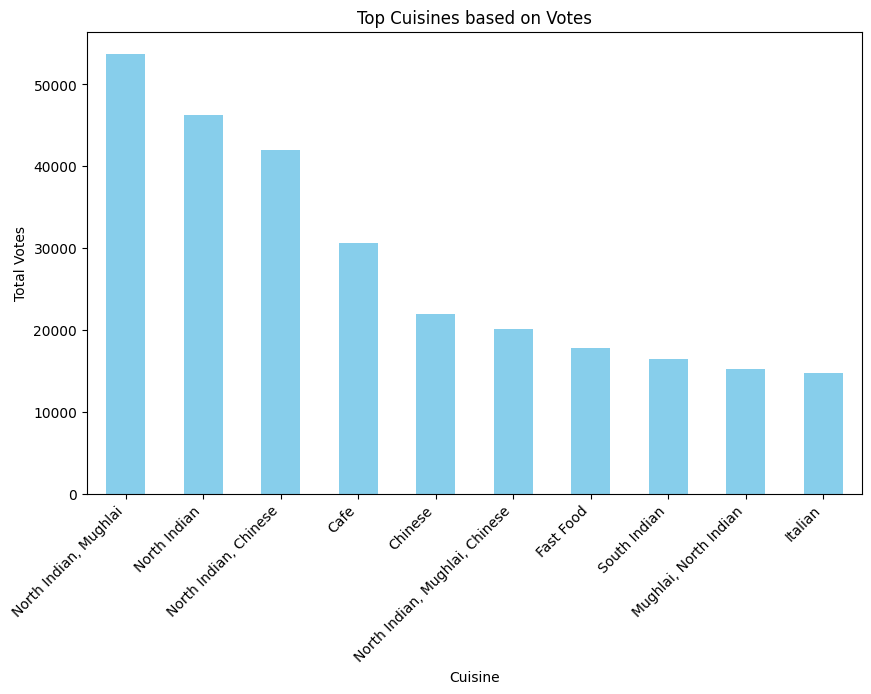

In [5]:
popular_cuisines=df.groupby('Cuisines')['Votes'].sum()
popular_cuisines=popular_cuisines.sort_values(ascending=False)
print("Top Cuisines based on Votes:")
print(popular_cuisines.head(10))
top_cuisines=popular_cuisines.head(10)
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar',color='skyblue')
plt.title('Top Cuisines based on Votes')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=45,ha='right')  
plt.show()


# LEVEL 3-Task 2(iii):Determine if there are any specific cuisinesthat tend to receive higher ratings.


Cuisines with the Highest Average Ratings:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


C:\Users\anand\AppData\Local\Temp\ipykernel_12068\505664948.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.index,y=top_cuisines.values,palette='viridis')


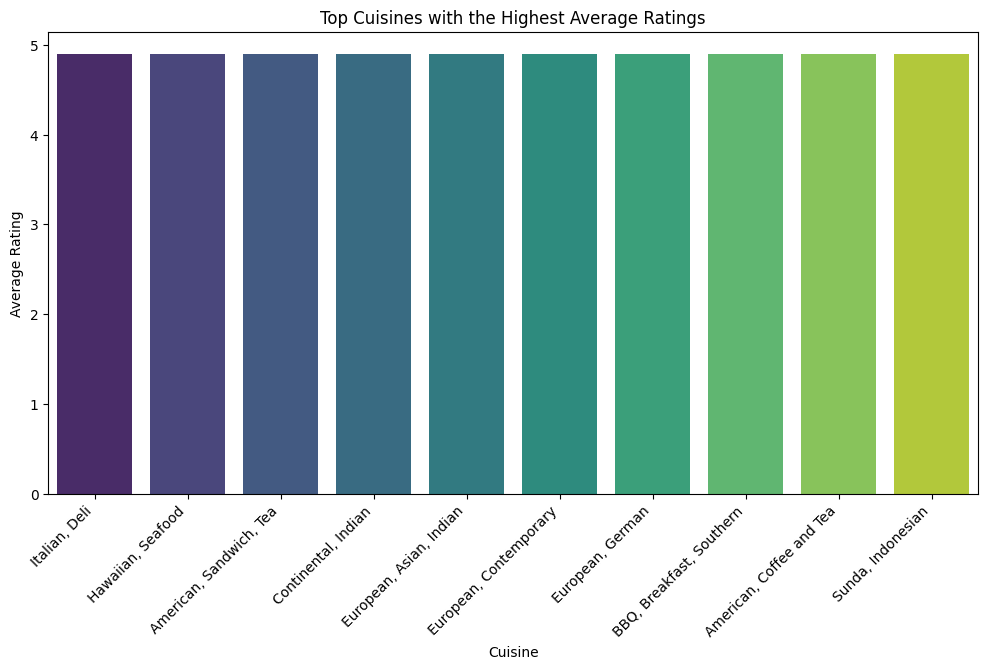

In [4]:
average_rating_by_cuisine=df.groupby('Cuisines')['Aggregate rating'].mean()
sorted_cuisines=average_rating_by_cuisine.sort_values(ascending=False)
print("Cuisines with the Highest Average Ratings:")
print(sorted_cuisines.head(10))
top_cuisines=sorted_cuisines.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.index,y=top_cuisines.values,palette='viridis')
plt.title('Top Cuisines with the Highest Average Ratings')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45,ha='right') 
plt.show()